In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt

### Display image in output

In [2]:
def show_image(image, title, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
image_path = "data/mona.png"
#image_path = "data/lena.png"

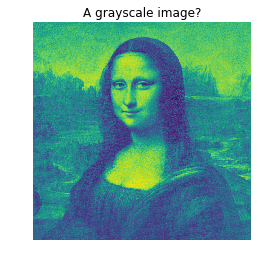

In [4]:
image = imread(image_path, flatten=True)
show_image(image=image, title="A grayscale image?")

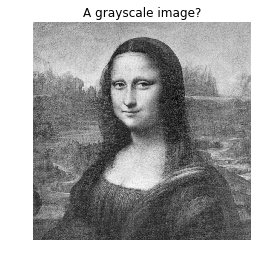

In [5]:
show_image(image=image, title="A grayscale image?",cmap='gray')

#### Shape of picture

In [6]:
img_shape = image.shape
print(img_shape)

(512, 512)


#### Intensity difference between a pixel and its right neighbor
The image has been flattened first

In [7]:
def flat_right_neighbor_pixel_difference(in_image):
    in_image_shape = in_image.shape
    in_image_flat = in_image.flatten() # Flatten the array
    out_image_flat = np.append(in_image_flat[1:], 0) # last element has no neighbor to the right so 0 is appended
    out_image = (in_image_flat - out_image_flat + 128).reshape(in_image_shape)
    return out_image

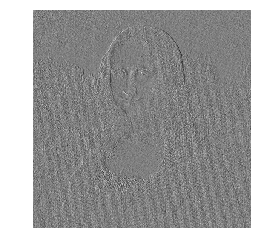

In [8]:
new_image = flat_right_neighbor_pixel_difference(in_image=image)
show_image(image=new_image, title="",cmap='gray')

#### Pixel difference between a pixel column and its right neighboring column
A zero column is added at the end to do the column substraction on the last column

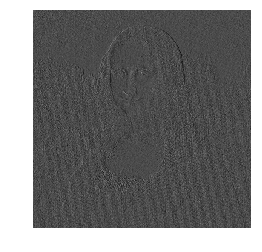

In [9]:
def column_right_neighbor_pixel_difference(in_image):
    n_row, n_col = in_image.shape[0], in_image.shape[1]
    out_image = in_image[:,1:n_col]
    z = np.zeros((n_row,1))
    out_image = np.append(out_image, z, axis=1) # append zeros to make it last column
    out_image = in_image - out_image + 128
    return out_image
   
col_right_neighbor_image = column_right_neighbor_pixel_difference(in_image=image)
show_image(image=col_right_neighbor_image, title="", cmap="gray")

#### Pixel intensity multiplication function
The <i>multi_factor</i> parameter should be chosen wisely. A float between 0 and 2 is recommended for bias as default (128)

In [10]:
def pixel_intensity_manipulation(original_image, multi_factor, bias=128):
    new_image = np.round(np.abs(bias-multi_factor*original_image))
    show_image(image=original_image, title="Original image", cmap="gray")
    show_image(image=new_image, title="Image manipulated with factor " + str(multi_factor), cmap="gray")

#### Manipulating pixel intensity on image

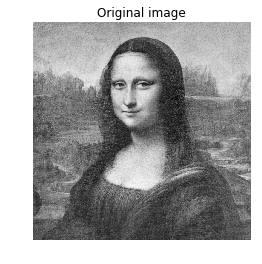

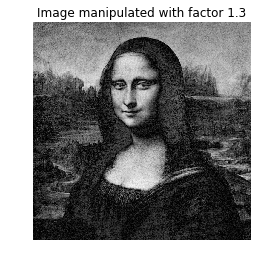

In [11]:
pixel_intensity_manipulation(original_image=image, multi_factor=1.3)

#### Manipulating pixel intensity on manipulated* image
*- values in right column have been deducted from values in current column

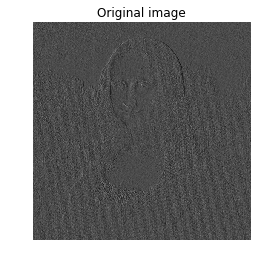

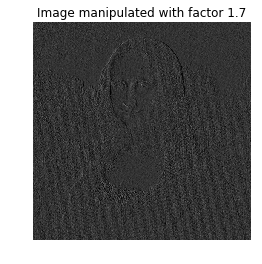

In [12]:
pixel_intensity_manipulation(original_image=col_right_neighbor_image, multi_factor=1.7)